<a href="https://colab.research.google.com/github/AronSoto/AronSoto/blob/main/Predict_Stok_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [8]:
data = pd.read_csv('Data/Alicorp_Data.csv')

In [9]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-01,10.33,10.35,10.30,10.33,7.723750,481893.0
1,2019-07-02,10.33,10.35,10.33,10.35,7.738705,50738.0
2,2019-07-03,10.35,10.35,10.34,10.34,7.731228,434470.0
3,2019-07-05,10.35,10.35,10.28,10.28,7.686365,87085.0
4,2019-07-08,10.28,10.28,10.15,10.15,7.589163,966146.0
...,...,...,...,...,...,...,...
1240,2024-06-04,6.18,6.20,6.18,6.20,6.200000,25149714.0
1241,2024-06-05,6.21,6.21,6.19,6.19,6.190000,1460487.0
1242,2024-06-06,6.15,6.19,6.15,6.19,6.190000,42240.0
1243,2024-06-07,NaN,NaN,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

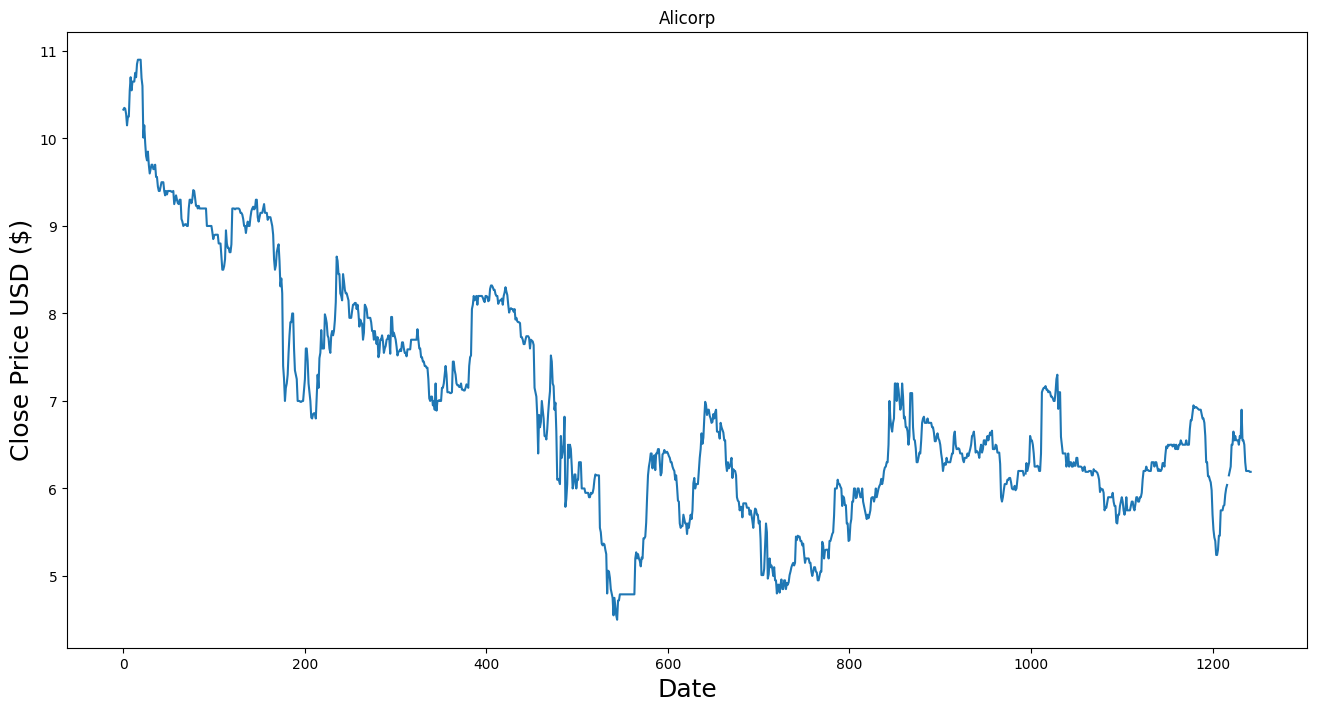

In [19]:
plt.figure(figsize=(16,8))
plt.title('Alicorp')
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show

In [30]:
# Eliminar filas con valores NaN
data = data.dropna()

In [65]:
#Crear nuevas variables
main_data= data.filter(['Close'])
#Convertiremos la data en un arreglo de numpy
dataset=data.values
#Obtendremos el numero de valores para entrenar el modelo
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

993

In [63]:
#Escalamiento de datos
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(main_data)
scaled_data

array([[0.9109375],
       [0.9140625],
       [0.9125   ],
       ...,
       [0.265625 ],
       [0.2640625],
       [0.2640625]])

In [66]:
# Escalar datos con StandarScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(main_data)
scaled_data


array([[ 2.63129193],
       [ 2.64664192],
       [ 2.63896693],
       ...,
       [-0.53848024],
       [-0.54615523],
       [-0.54615523]])

In [67]:
#Crearemos los datos de entrenamiento
train_data=scaled_data[0:training_data_len,:]
#Dividiremos los datos en x_train y y_train
x_train=[]
y_train=[]
#Split the data into x_train and y_train data sets
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(X_train)
        print(y_train)
        print()


[array([2.63129193, 2.64664192, 2.63896693, 2.59291697, 2.49314206,
       2.56989199, 2.56989199, 2.80014178, 2.91526668, 2.80014178,
       2.87689171, 2.87689171, 2.87689171, 2.95364165, 2.91526668,
       3.03039158, 3.06876654, 3.06876654, 3.06876654, 3.06876654,
       2.90759169, 2.83851675, 2.38569215, 2.49314206, 2.33964219,
       2.2245173 , 2.18614233, 2.26289226, 2.14776736, 2.07101743,
       2.1093924 , 2.14776736, 2.14776736, 2.1093924 , 2.1093924 ,
       2.14776736, 2.04031746, 2.04031746, 1.95589254, 1.91751757,
       1.91751757, 1.95589254, 1.9942675 , 1.9942675 , 1.9942675 ,
       1.91751757, 1.8791426 , 1.91751757, 1.8868176 , 1.91751757,
       1.91751757, 1.91751757, 1.91751757, 1.90984258, 1.90984258,
       1.91751757, 1.80239267, 1.84076764, 1.8791426 , 1.84076764])]
[1.8100676654882373]

[array([2.63129193, 2.64664192, 2.63896693, 2.59291697, 2.49314206,
       2.56989199, 2.56989199, 2.80014178, 2.91526668, 2.80014178,
       2.87689171, 2.87689171, 2.876

In [68]:
#Convertiremos los valores de [x] y [y] en arreglos de numpy
x_train, y_train = np.array(X_train), np.array(y_train)

In [69]:
#Remodelaremos los datos
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(933, 60, 1)

In [70]:
#Construccion del modelo LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [71]:
#Compilaremos el modelo
model.compile(optimizer='adam',loss='mean_squared_error')

In [72]:
#Entrenamiento del modelo
model.fit(x_train,y_train,batch_size=1,epochs=1)

933/933 [==============================] - 32s 29ms/step - loss: 0.0465


In [73]:
#Crearemos la data de entrenamiento
#Crearemos los nuevos arerglos escalabes
test_data=scaled_data[training_data_len-60:,:]
#Creamos los datos de prueba
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [74]:
#Convertiremos la data entrenada en un arreglo de numpy
x_test=np.array(x_test)

In [75]:
#Remodelaremos la data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [76]:
#Obtendremos los valores del modelo de prediccion LSTM
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 15ms/step


In [77]:
#Evaluaremos mediante el RMSE
#Conversion a float (assuming the relevant column is the closing price)
y_test_numeric = y_test[:, 4].astype(float)

rmse = np.sqrt(np.mean((predictions - y_test_numeric)**2))
print(rmse)

0.5963949148828666


In [78]:
#Evaluaremos mediante MAE
mae = np.mean(np.abs(predictions - y_test_numeric))
print(mae)

0.4707224888694894


In [79]:
#Evaluaremos mediante R2
r2 = r2_score(y_test_numeric, predictions)
print(r2)

0.8517875948687799


In [80]:
#Evaluaremos mediante MSE
mse = np.mean((predictions - y_test_numeric)**2)
print(mse)

0.3556868944981416


In [81]:
#Evaluaremos mediante MAPE
mape = np.mean(np.abs((predictions - y_test_numeric) / y_test_numeric)) * 100
print(mape)

7.491150103984788


<ipython-input-82-490f03106bdf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


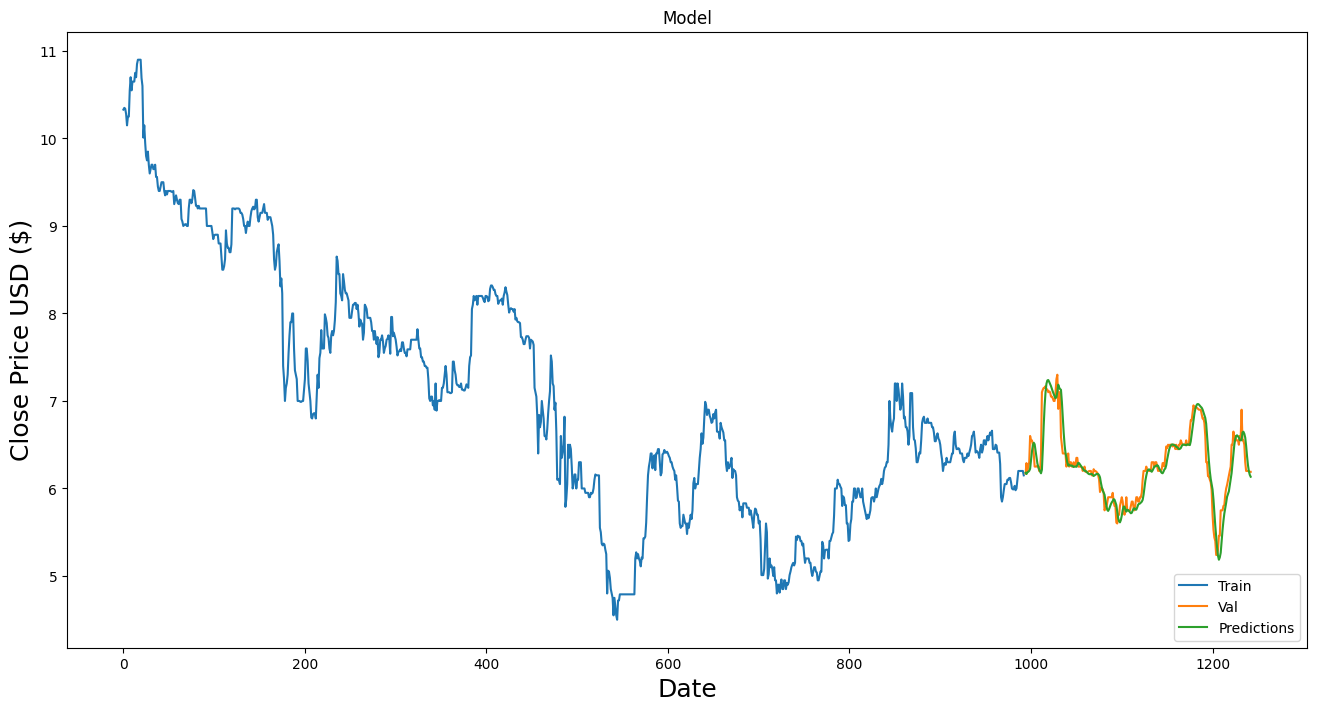

In [82]:
#Plot the Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualizacion
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [83]:
#Mostraremos los valores predictivos
valid

,Date,Open,High,Low,Close,Adj Close,Volume,Predictions
994,2023-06-12,6.15,6.17,6.15,6.17,6.17,19197.0,6.178047
995,2023-06-13,6.20,6.30,6.20,6.29,6.29,186939.0,6.165363
996,2023-06-14,6.30,6.30,6.20,6.20,6.20,26843.0,6.185802
997,2023-06-15,6.25,6.25,6.25,6.25,6.25,371113.0,6.191085
998,2023-06-16,6.29,6.30,6.29,6.30,6.30,110569.0,6.201824
...,...,...,...,...,...,...,...,...
1238,2024-05-31,6.20,6.20,6.20,6.20,6.20,167367.0,6.369901
1239,2024-06-03,6.20,6.20,6.20,6.20,6.20,12564.0,6.269131
1240,2024-06-04,6.18,6.20,6.18,6.20,6.20,25149714.0,6.198387
1241,2024-06-05,6.21,6.21,6.19,6.19,6.19,1460487.0,6.156473


In [84]:
# Porcentaje de Acertividad
valid['Diferencia'] = abs(valid['Close'] - valid['Predictions'])
valid['Porcentaje de Error'] = (valid['Diferencia'] / valid['Close']) * 100
porcentaje_promedio_error = valid['Porcentaje de Error'].mean()
porcentaje_acertividad = 100 - porcentaje_promedio_error
print("El porcentaje de acertividad del modelo es: {:.2f}%".format(porcentaje_acertividad))


El porcentaje de acertividad del modelo es: 98.33%


<ipython-input-84-6898255fbc76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Diferencia'] = abs(valid['Close'] - valid['Predictions'])
<ipython-input-84-6898255fbc76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Porcentaje de Error'] = (valid['Diferencia'] / valid['Close']) * 100
